<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/Worldhappiness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **World Happiness Score**

# **1. Introduction**


**Your client for this project is an NGO.**

* The Happiness Foundation has been around for the last two decades and spans across more than 150 countries.
* The NGO comprises professionals and grassroots workers from various walks of life.
* The team includes young passionate individuals from different backgrounds who derive contentment by helping the needy, poor, and down-trodden.


**Current Scenario:**

The foundation has gathered teams from across the world who have been invited for an exhibition of a system that determines the happiness of a particular individual based on certain factors.



# **2. Problem Statement**

The current process suffers from the following problems:

* With the help of Gallup World Polls, they determine the happiness of individuals across various countries.
* The current process is a resource and time-consuming given that data has to be collected from individuals, processed, analyzed, and then determined what the future results of polls will look like.
* They want to automate the process of predicting the future poll results based on certain given factors.




# **3. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# **4. Data Acquisition & Description**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/happiness_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/happiness_test.csv")
dataValidationId=dataValidation.ID
data.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
0,Jordan,2008,9.343,0.766,64.22,NaN,-0.127,0.709,0.669,0.331,862,4.930
1,Estonia,2013,10.299,0.901,67.48,0.754,-0.201,0.726,0.702,0.199,534,5.367
2,Sweden,2018,10.881,0.931,72.60,0.942,0.077,0.263,0.823,0.161,1649,7.375
3,Tajikistan,2006,7.554,0.724,60.64,0.702,-0.088,0.768,0.566,0.195,1682,4.613
4,Kuwait,2014,10.945,NaN,65.80,NaN,NaN,NaN,NaN,NaN,925,6.180


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Log GDP per capita                1533 non-null   float64
 3   Social support                    1549 non-null   float64
 4   Healthy life expectancy at birth  1522 non-null   float64
 5   Freedom to make life choices      1537 non-null   float64
 6   Generosity                        1488 non-null   float64
 7   Perceptions of corruption         1473 non-null   float64
 8   Positive affect                   1542 non-null   float64
 9   Negative affect                   1545 non-null   float64
 10  ID                                1559 non-null   int64  
 11  Life Ladder                       1559 non-null   float64
dtypes: flo

In [ ]:
dataValidation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      390 non-null    object 
 1   year                              390 non-null    int64  
 2   Log GDP per capita                380 non-null    float64
 3   Social support                    387 non-null    float64
 4   Healthy life expectancy at birth  372 non-null    float64
 5   Freedom to make life choices      380 non-null    float64
 6   Generosity                        372 non-null    float64
 7   Perceptions of corruption         366 non-null    float64
 8   Positive affect                   385 non-null    float64
 9   Negative affect                   388 non-null    float64
 10  ID                                390 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 33.6+ KB


In [ ]:
data["Country name"].nunique()

165

### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
count,1559.000000,1533.000000,1549.000000,1522.000000,1537.000000,1488.000000,1473.000000,1542.000000,1545.000000,1559.000000,1559.000000
mean,2013.131495,9.362995,0.812689,63.331680,0.741882,0.000343,0.748248,0.708551,0.267644,974.962797,5.469321
std,4.206026,1.160240,0.118762,7.478307,0.142326,0.163385,0.186708,0.108029,0.084431,562.023107,1.113280
min,2005.000000,6.635000,0.290000,32.300000,0.260000,-0.335000,0.035000,0.322000,0.083000,0.000000,2.375000
25%,2010.000000,8.460000,0.753000,58.340000,0.646000,-0.113000,0.691000,0.623000,0.206000,494.500000,4.649500
50%,2013.000000,9.456000,0.835000,65.180000,0.763000,-0.025000,0.804000,0.721000,0.258000,973.000000,5.374000
75%,2017.000000,10.332000,0.905000,68.535000,0.855000,0.091000,0.873000,0.798000,0.319000,1459.500000,6.272500
max,2020.000000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000,1948.000000,8.019000


# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**


In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

####Check null value or any other inconsistent value in column

In [ ]:
data.isnull().sum()

Country name                         0
year                                 0
Log GDP per capita                  26
Social support                      10
Healthy life expectancy at birth    37
Freedom to make life choices        22
Generosity                          71
Perceptions of corruption           86
Positive affect                     17
Negative affect                     14
ID                                   0
Life Ladder                          0
dtype: int64

####Check empty space in column

In [ ]:
(data=="").sum()


Country name                        0
year                                0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
ID                                  0
Life Ladder                         0
dtype: int64

####Check unknown value in column



In [ ]:
(data=="Unknown").sum()


Country name                        0
year                                0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
ID                                  0
Life Ladder                         0
dtype: int64

In [ ]:
data.duplicated().any()

False

####Check distribution of numerical features and Outliers

Log GDP per capita
Social support
Healthy life expectancy at birth


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Freedom to make life choices
Generosity
Perceptions of corruption


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Positive affect
Negative affect


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Life Ladder


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


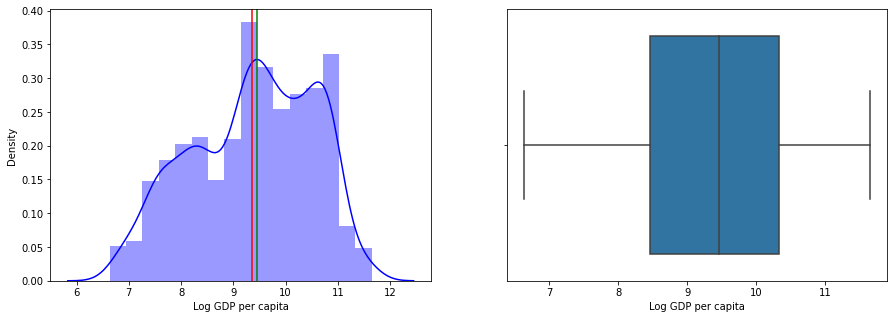

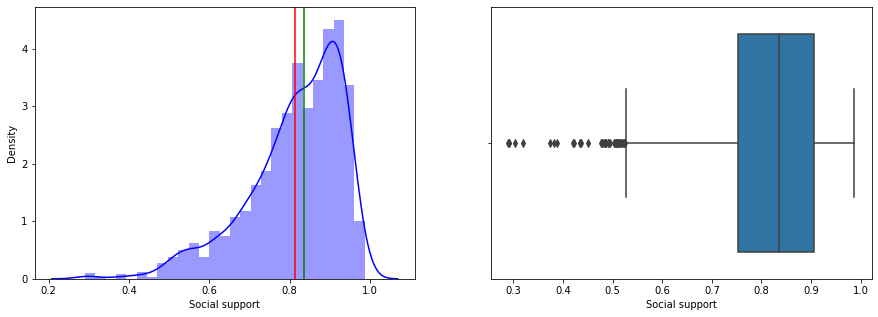

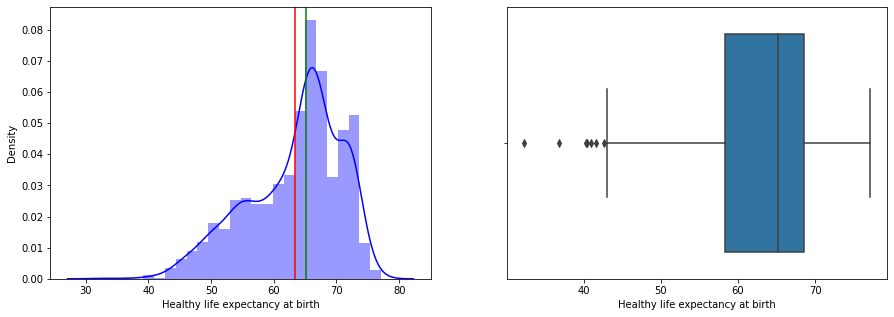

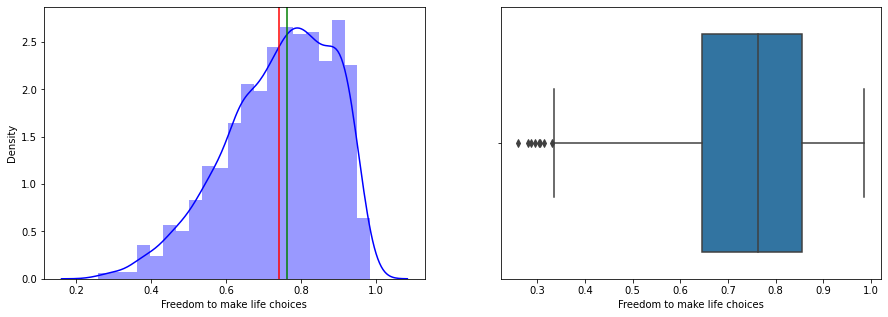

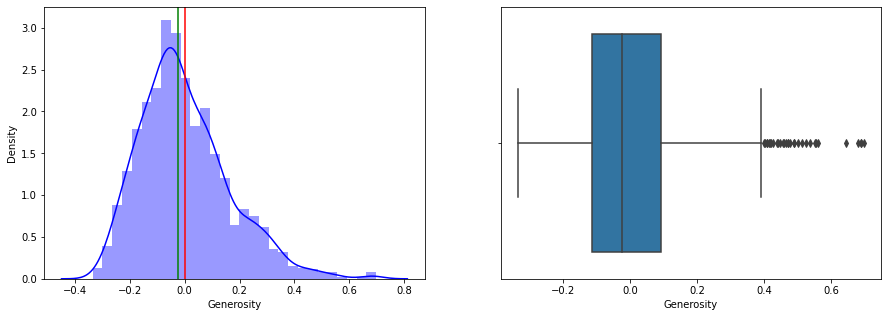

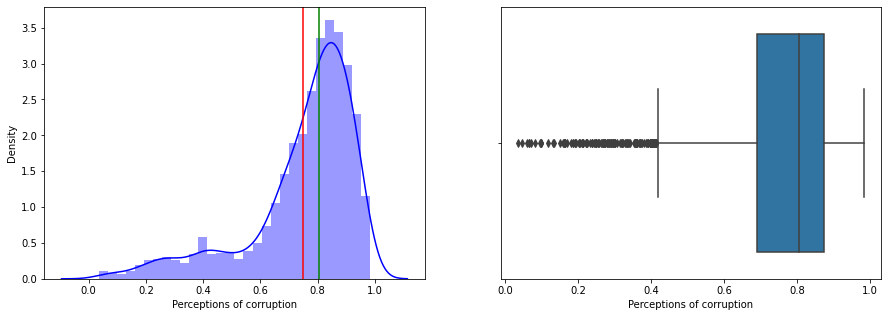

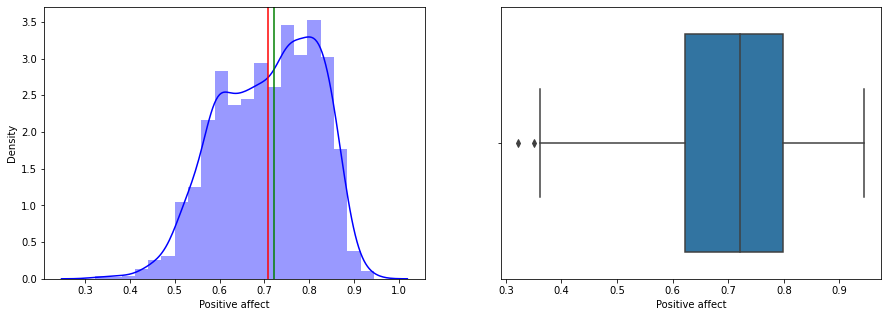

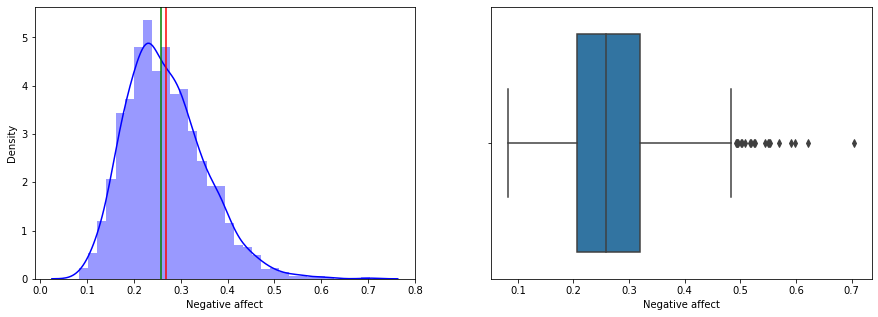

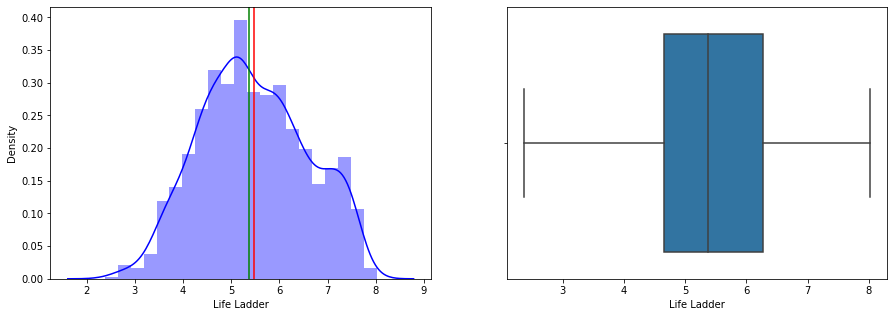

In [ ]:
contColumn=((data.select_dtypes(include=np.number)).drop(["ID","year"], axis=1)).columns.to_list()
contColumn

for col in contColumn: 
  print(col)
  fig=plt.figure(figsize=[15,5])
  plt.subplot(1,2,1)
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")

  plt.subplot(1,2,2)
  sns.boxplot(x=data[col], data=data)




  

### **5.2 Data Cleaning**


In [ ]:
contColumn

['Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Life Ladder']

In [ ]:
colImpute=contColumn
colImpute.remove("Life Ladder")
colImpute

['Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [ ]:
print(data.isna().sum())
print(dataValidation.isna().sum())

Country name                         0
year                                 0
Log GDP per capita                  26
Social support                      10
Healthy life expectancy at birth    37
Freedom to make life choices        22
Generosity                          71
Perceptions of corruption           86
Positive affect                     17
Negative affect                     14
ID                                   0
Life Ladder                          0
dtype: int64
Country name                         0
year                                 0
Log GDP per capita                  10
Social support                       3
Healthy life expectancy at birth    18
Freedom to make life choices        10
Generosity                          18
Perceptions of corruption           24
Positive affect                      5
Negative affect                      2
ID                                   0
dtype: int64


In [ ]:
# to resolve log GDP per capita

from sklearn.impute import KNNImputer
impute=KNNImputer()
dataTrans=pd.DataFrame(impute.fit_transform(data[colImpute]),columns=colImpute)
dataTrans["Country name"]=data["Country name"]
dataTrans["year"]=data["year"]
dataTrans["Life Ladder"]=data["Life Ladder"]

dataValidationTrans=pd.DataFrame(impute.transform(dataValidation[colImpute]),columns=colImpute)
dataValidationTrans["Country name"]=dataValidation["Country name"]
dataValidationTrans["year"]=dataValidation["year"]

print(dataTrans.isna().sum())
print(dataValidationTrans.isna().sum())




Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
Country name                        0
year                                0
Life Ladder                         0
dtype: int64
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
Country name                        0
year                                0
dtype: int64


# **6. Exploratory Data Analysis**

### **Analize country and happiness score**

Text(0.5, 1.0, 'Bottom 10 country in happiness score')

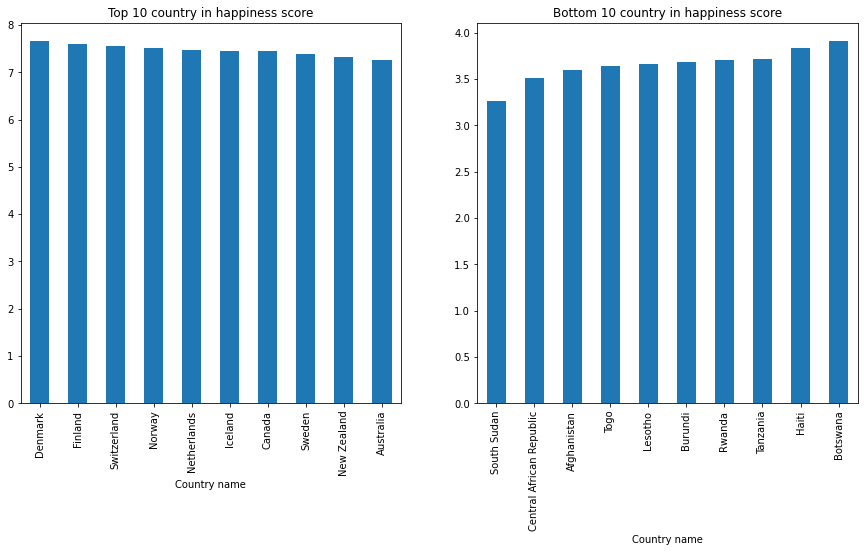

In [ ]:
plt.subplot(1,2,1)
dataTrans.groupby("Country name")["Life Ladder"].mean().sort_values(ascending=False)[:10].plot.bar(figsize=[15,7])
plt.title("Top 10 country in happiness score")
plt.subplot(1,2,2)
dataTrans.groupby("Country name")["Life Ladder"].mean().sort_values(ascending=True)[:10].plot.bar(figsize=[15,7])
plt.title("Bottom 10 country in happiness score")



### **Analize Year vs happiness score and GDP**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Year and GDP')

<Figure size 1080x504 with 0 Axes>

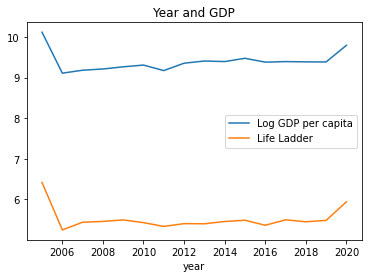

In [ ]:
figure=plt.figure(figsize=[15,7])
# plt.subplot(1,3,1)
# dataTrans.groupby("year")["Life Ladder"].mean().plot.bar()
# plt.title("Year and happiness score")
# plt.subplot(1,3,2)
# dataTrans.groupby("year")["Log GDP per capita"].mean().plot.bar()
# plt.title("Year and GDP")
# plt.subplot(1,3,3)
dataTrans.groupby("year")["Log GDP per capita","Life Ladder"].mean().plot.line()
plt.title("Year and GDP")

### **Analyse Relations between diffrent features and Happiness Score**

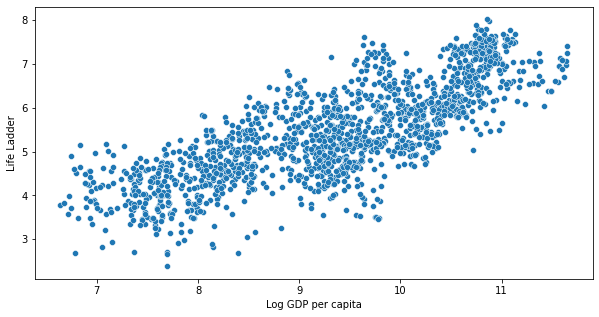

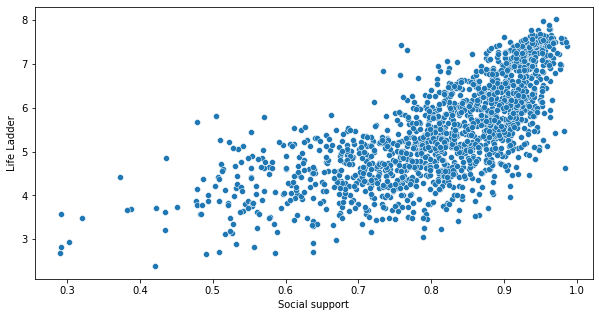

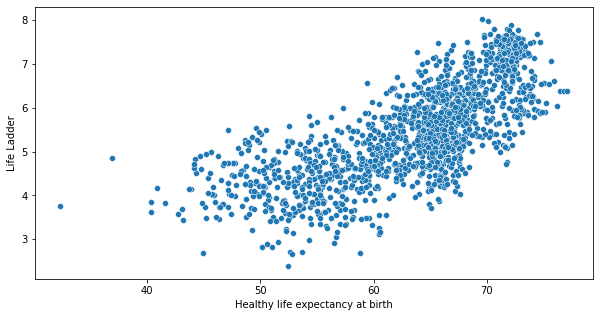

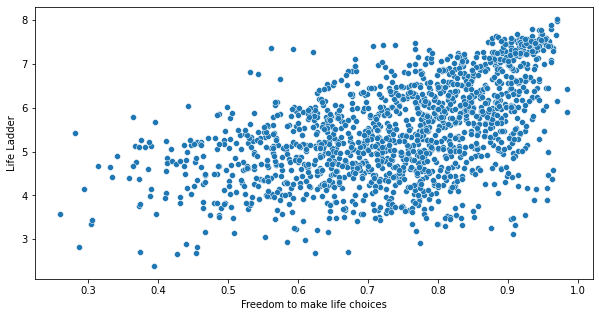

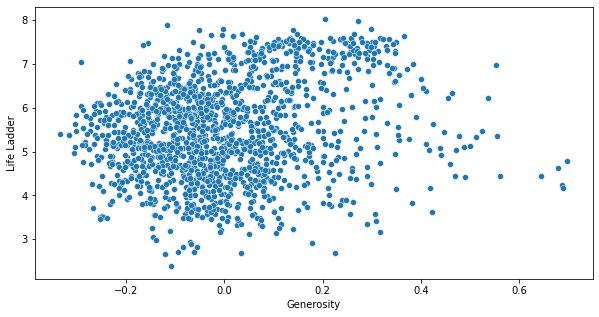

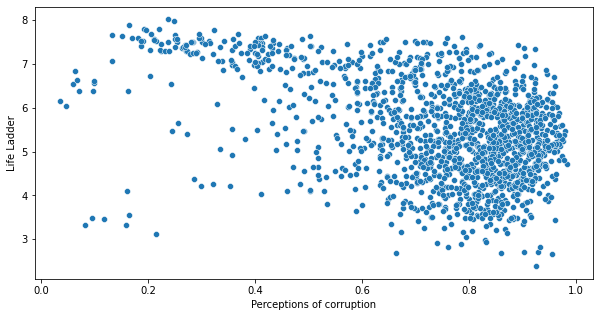

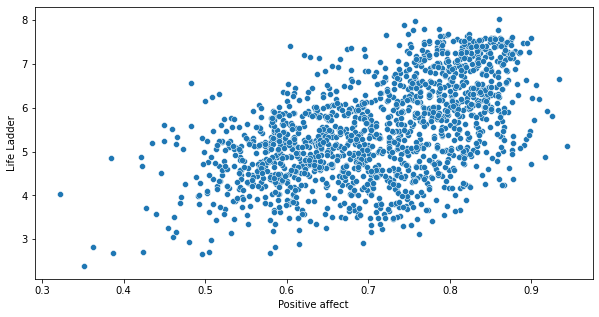

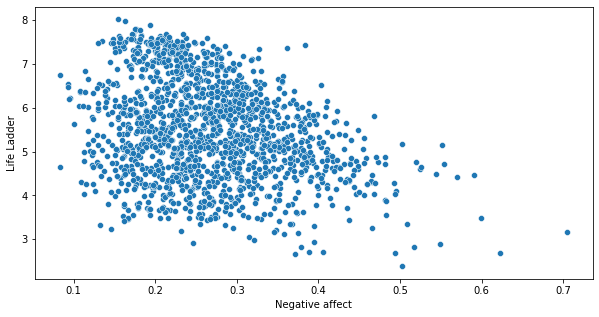

In [ ]:
for col in colImpute:
  figure=plt.figure(figsize=[10,5])
  sns.scatterplot(x=col,y="Life Ladder",data=dataTrans)


  



### **Correlation Matrix**

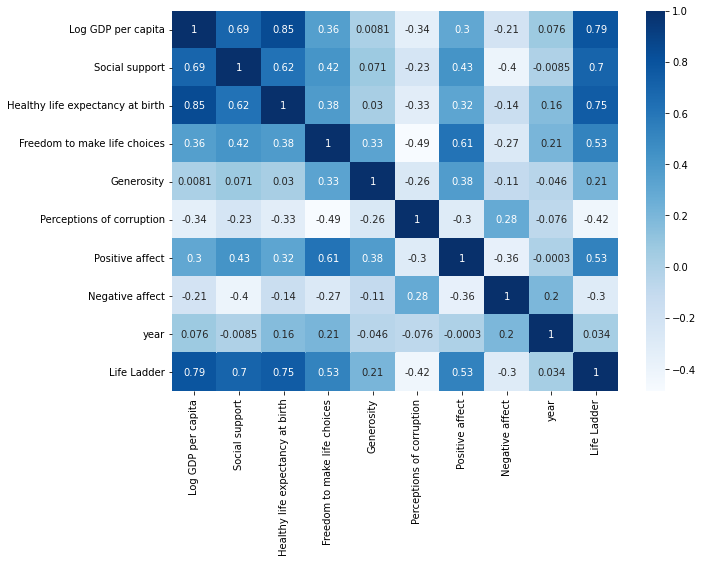

In [ ]:
figure=plt.figure(figsize=[10,7])
sns.heatmap(dataTrans.corr(),cmap="Blues",annot=True)

# **7. Data Post-Processing**

### **7.1 Data Preparation**



In [ ]:
dataTrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log GDP per capita                1559 non-null   float64
 1   Social support                    1559 non-null   float64
 2   Healthy life expectancy at birth  1559 non-null   float64
 3   Freedom to make life choices      1559 non-null   float64
 4   Generosity                        1559 non-null   float64
 5   Perceptions of corruption         1559 non-null   float64
 6   Positive affect                   1559 non-null   float64
 7   Negative affect                   1559 non-null   float64
 8   Country name                      1559 non-null   object 
 9   year                              1559 non-null   int64  
 10  Life Ladder                       1559 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 134.1+ KB


In [ ]:
dataValidationTrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log GDP per capita                390 non-null    float64
 1   Social support                    390 non-null    float64
 2   Healthy life expectancy at birth  390 non-null    float64
 3   Freedom to make life choices      390 non-null    float64
 4   Generosity                        390 non-null    float64
 5   Perceptions of corruption         390 non-null    float64
 6   Positive affect                   390 non-null    float64
 7   Negative affect                   390 non-null    float64
 8   Country name                      390 non-null    object 
 9   year                              390 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 30.6+ KB


In [ ]:
#**Remove Irrelavent Features**
dataTrans=dataTrans.drop(["Country name","year"], axis=1)
dataValidationTrans=dataValidationTrans.drop(["Country name","year"], axis=1)
X=dataTrans.drop("Life Ladder",axis=1)
y=data["Life Ladder"]
print(X)
print(y)



      Log GDP per capita  Social support  Healthy life expectancy at birth  \
0                  9.343          0.7660                            64.220   
1                 10.299          0.9010                            67.480   
2                 10.881          0.9310                            72.600   
3                  7.554          0.7240                            60.640   
4                 10.945          0.8564                            65.800   
...                  ...             ...                               ...   
1554               9.192          0.8030                            62.260   
1555               9.613          0.7660                            65.145   
1556               9.246          0.9200                            63.500   
1557               7.428          0.6370                            57.440   
1558               8.984          0.8560                            61.120   

      Freedom to make life choices  Generosity  Perceptions of 

In [ ]:
X.describe()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000
mean,9.361681,0.813039,63.359857,0.742001,-0.000124,0.741528,0.708704,0.267229
std,1.154226,0.118501,7.413362,0.141507,0.161554,0.185207,0.107684,0.084307
min,6.635000,0.290000,32.300000,0.260000,-0.335000,0.035000,0.322000,0.083000
25%,8.471000,0.753500,58.690000,0.647400,-0.112500,0.674800,0.623000,0.206000
50%,9.450000,0.836000,65.160000,0.763000,-0.025000,0.795000,0.721000,0.257000
75%,10.324000,0.905000,68.500000,0.853500,0.089000,0.868000,0.798000,0.319000
max,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


# **8. Model Development & Evaluation**

### **List of estimator in a loop**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)
mdlList=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),RandomForestRegressor(),
         BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10,weights="uniform"),n_estimators=30),
         AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10),n_estimators=50,learning_rate=1),
         GradientBoostingRegressor(learning_rate=.1,subsample=.7),
         VotingRegressor([("lr",LinearRegression()),("rf",RandomForestRegressor()),("bg",BaggingRegressor()),
                                            ("ada",AdaBoostRegressor()),("grad",GradientBoostingRegressor())])]
scaler=RobustScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.fit_transform(X_test)
dataValidation_scale=scaler.transform(dataValidationTrans)

score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])
for mdl in mdlList:
  print(mdl)
  mdl.fit(X_train_scale,y_train)
  y_train_pred=mdl.predict(X_train_scale)
  y_test_pred=mdl.predict(X_test_scale)
  r2_train=r2_score(y_train,y_train_pred)
  r2_test=r2_score(y_test,y_test_pred)
  adj_r2_train=1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
  adj_r2_test=1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
  
  # score_df=score_df.append({"ModelName":mdl,"TrainScore": "R2:{},  \nAdj R2:{}".format(r2_train,adj_r2_train),
  #                  "TestScore": "R2:{},  \nAdj R2:{}".format(r2_test,adj_r2_test)},ignore_index=True)
  score_df=score_df.append({"ModelName":mdl,"TrainScore": "R2:{}".format(r2_train),
                   "TestScore": "R2:{}".format(r2_test)},ignore_index=True)
score_df





LinearRegression()
KNeighborsRegressor(n_neighbors=10)
RandomForestRegressor()
BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10),
                 n_estimators=30)
AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10),
                  learning_rate=1)
GradientBoostingRegressor(subsample=0.7)
VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor()),
                            ('bg', BaggingRegressor()),
                            ('ada', AdaBoostRegressor()),
                            ('grad', GradientBoostingRegressor())])


,ModelName,TrainScore,TestScore
0,LinearRegression(),R2:0.7755741454735882,R2:0.7178167208483763
1,KNeighborsRegressor(n_neighbors=10),R2:0.8552877445685504,R2:0.7759187435573951
2,"(DecisionTreeRegressor(max_features='auto', ra...",R2:0.9802768086716986,R2:0.8060044796203613
3,"(KNeighborsRegressor(n_neighbors=10), KNeighbo...",R2:0.8589235681297998,R2:0.7747825025193951
4,"(KNeighborsRegressor(n_neighbors=10), KNeighbo...",R2:0.8778649073196124,R2:0.7674151934387426
5,([DecisionTreeRegressor(criterion='friedman_ms...,R2:0.9161595453247164,R2:0.7885468779816096
6,"VotingRegressor(estimators=[('lr', LinearRegre...",R2:0.924800551757335,R2:0.7917094499984829


### **List of estimator in a loop with CV Score**

In [ ]:
colImpute

['Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [ ]:
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
# Define which columns should be scaled
columns_to_scale=colImpute
kf=KFold(8,shuffle=True,random_state=1)

robScale=RobustScaler()
# Instantiate column transformer
column_trans=make_column_transformer((RobustScaler(),columns_to_scale))

mdlList=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),RandomForestRegressor(),
         BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10,weights="uniform"),n_estimators=30),
         AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10),n_estimators=50,learning_rate=1),
         GradientBoostingRegressor(learning_rate=.1,subsample=.5),
         VotingRegressor([("lr",LinearRegression()),("rf",RandomForestRegressor()),("bg",BaggingRegressor()),
                                            ("ada",AdaBoostRegressor()),("grad",GradientBoostingRegressor())])]
score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])
for mdl in mdlList:
  # Make Pipeline
  

  pipe=make_pipeline(column_trans,mdl)
  cv_score=cross_validate(pipe,X,y,cv=kf,n_jobs=-1,scoring="r2",return_train_score=True)
  cv_score_df=pd.DataFrame(cv_score)
  score_df=score_df.append({"ModelName":mdl,"TrainScore":cv_score_df.train_score.mean(),
                   "TestScore":cv_score_df.test_score.mean()},ignore_index=True)
  
score_df






,ModelName,TrainScore,TestScore
0,LinearRegression(),0.761120,0.755845
1,KNeighborsRegressor(n_neighbors=10),0.859882,0.822241
2,RandomForestRegressor(),0.979826,0.853711
3,BaggingRegressor(base_estimator=KNeighborsRegr...,0.861969,0.825625
4,AdaBoostRegressor(base_estimator=KNeighborsReg...,0.879183,0.798393
5,GradientBoostingRegressor(subsample=0.5),0.893725,0.820616
6,"VotingRegressor(estimators=[('lr', LinearRegre...",0.917306,0.834775


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


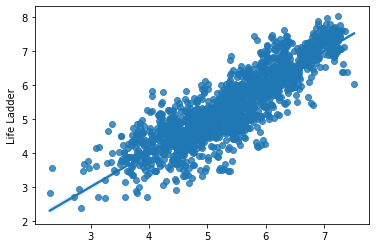

In [ ]:
pipe=make_pipeline(column_trans,LinearRegression())
pipe.fit(X,y)
y_pred=pipe.predict(X)
sns.regplot(y_pred,y)

### **Stacking Regressor**

In [ ]:
from sklearn.ensemble import StackingRegressor
# Creating a collection of estimators
estimators = [('knn', KNeighborsRegressor(n_neighbors=5, n_jobs=-1)), 
              ('knn1', KNeighborsRegressor(n_neighbors=5, n_jobs=-1)),
              ('knn2', KNeighborsRegressor(n_neighbors=5, n_jobs=-1)),
              ('knn3', KNeighborsRegressor(n_neighbors=5, n_jobs=-1))]
estimators1 = [('rf1', RandomForestRegressor(n_jobs=-1)), 
              (('rf2', RandomForestRegressor(n_jobs=-1))),
              (('rf3', RandomForestRegressor(n_jobs=-1))),
              (('rf4', RandomForestRegressor(n_jobs=-1)))]

# Setting StackingClassifier with initiated estimators and a final estimator
stack_clf = StackingRegressor(estimators=estimators1, 
                               final_estimator=GradientBoostingRegressor(learning_rate=.1,subsample=.5,random_state=42), 
                               n_jobs=-1, cv=8)
colTrans=make_column_transformer((RobustScaler(),colImpute))
pipe=make_pipeline(colTrans,stack_clf)
# pipe.fit(X,y)
# pipe.score(X,y)
score=cross_validate(pipe,X,y,cv=kf,n_jobs=-1,scoring="r2",return_train_score=True)
print("TrainScore : ",score.get("train_score").mean())
print("TestScore : ",score.get("test_score").mean())
# score.train_score.mean()
# score.test_score.mean()


TrainScore :  0.9691674103025225
TestScore :  0.8419811467866762


### **Bagging Regressor with LR**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder,LabelEncoder

# Define which columns should be scaled
columns_to_scale=colImpute

robScale=RobustScaler()
# Instantiate column transformer
column_trans=make_column_transformer((RobustScaler(),columns_to_scale))

mdl=BaggingRegressor(base_estimator=LinearRegression(),n_estimators=20)
score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])

# Make Pipeline
pipe=make_pipeline(column_trans,mdl)
cv_score=cross_validate(pipe,X,y,cv=5,n_jobs=-1,scoring="r2",return_train_score=True)
cv_score_df=pd.DataFrame(cv_score)
score_df=score_df.append({"ModelName":mdl,"TrainScore":cv_score_df.train_score.mean(),
                  "TestScore":cv_score_df.test_score.mean()},ignore_index=True)
score_df






,ModelName,TrainScore,TestScore
0,BaggingRegressor(base_estimator=LinearRegressi...,0.761167,0.755804


### **Bagging Regressor with KNN**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
# Define which columns should be scaled
columns_to_scale=colImpute

robScale=RobustScaler()
# Instantiate column transformer
column_trans=make_column_transformer((RobustScaler(),columns_to_scale))

mdl=BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10,weights="uniform"),n_estimators=30)
score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])

# Make Pipeline
pipe=make_pipeline(column_trans,mdl)
cv_score=cross_validate(pipe,X,y,cv=5,n_jobs=-1,scoring="r2",return_train_score=True)
cv_score_df=pd.DataFrame(cv_score)
score_df=score_df.append({"ModelName":mdl,"TrainScore":cv_score_df.train_score.mean(),
                  "TestScore":cv_score_df.test_score.mean()},ignore_index=True)
score_df






,ModelName,TrainScore,TestScore
0,BaggingRegressor(base_estimator=KNeighborsRegr...,0.858287,0.818253


### **Voting Regressor with KNN**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
# Define which columns should be scaled
columns_to_scale=colImpute

robScale=RobustScaler()
# Instantiate column transformer
column_trans=make_column_transformer((RobustScaler(),columns_to_scale))

mdl=VotingRegressor([("knn",KNeighborsRegressor(n_neighbors=10)),("rf",RandomForestRegressor())])
score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])

# Make Pipeline
pipe=make_pipeline(column_trans,mdl)
cv_score=cross_validate(pipe,X,y,cv=5,n_jobs=-1,scoring="r2",return_train_score=True)
cv_score_df=pd.DataFrame(cv_score)
score_df=score_df.append({"ModelName":mdl,"TrainScore":cv_score_df.train_score.mean(),
                  "TestScore":cv_score_df.test_score.mean()},ignore_index=True)
score_df






,ModelName,TrainScore,TestScore
0,"VotingRegressor(estimators=[('knn', KNeighbors...",0.936403,0.849712


### **Adaboost Regressor with KNN**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
# Define which columns should be scaled
columns_to_scale=colImpute

robScale=RobustScaler()
# Instantiate column transformer
column_trans=make_column_transformer((RobustScaler(),columns_to_scale))
column_trans.fit_transform
mdl=AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10),n_estimators=50,learning_rate=1)
score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])

# Make Pipeline
pipe=make_pipeline(column_trans,mdl)
cv_score=cross_validate(pipe,X,y,cv=5,n_jobs=-1,scoring="r2",return_train_score=True)
cv_score_df=pd.DataFrame(cv_score)
score_df=score_df.append({"ModelName":mdl,"TrainScore":cv_score_df.train_score.mean(),
                  "TestScore":cv_score_df.test_score.mean()},ignore_index=True)
score_df


# pipe.get_feature_names_out



,ModelName,TrainScore,TestScore
0,AdaBoostRegressor(base_estimator=KNeighborsReg...,0.874685,0.794824


### **Gradient Boost Regressor**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
# Define which columns should be scaled
columns_to_scale=colImpute

robScale=RobustScaler()
# Instantiate column transformer
column_trans=make_column_transformer((RobustScaler(),columns_to_scale))

mdlGrad=GradientBoostingRegressor(learning_rate=.1,subsample=.7)
score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])

# Make Pipeline
pipe=make_pipeline(column_trans,mdl)
cv_score=cross_validate(pipe,X,y,cv=5,n_jobs=-1,scoring="r2",return_train_score=True)
cv_score_df=pd.DataFrame(cv_score)
score_df=score_df.append({"ModelName":mdlGrad,"TrainScore":cv_score_df.train_score.mean(),
                  "TestScore":cv_score_df.test_score.mean()},ignore_index=True)
score_df






,ModelName,TrainScore,TestScore
0,GradientBoostingRegressor(subsample=0.7),0.874759,0.79574


### **Adaboost Regressor Analysis**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)
mdl=AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10),n_estimators=5,learning_rate=10)
score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])

mdl.fit(X_train,y_train)
y_train_pred=mdl.predict(X_train)
y_test_pred=mdl.predict(X_test)
r2_train=r2_score(y_train,y_train_pred)
r2_test=r2_score(y_test,y_test_pred)
adj_r2_train=1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_test=1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# score_df=score_df.append({"ModelName":mdl,"TrainScore": "R2:{} \n  Adj R2:{}".format(r2_train,adj_r2_train),
                  #  "TestScore": "R2:{}\n  Adj R2:{}".format(r2_test,adj_r2_test)},ignore_index=True)
score_df=score_df.append({"ModelName":mdl,"TrainScore": r2_train,"TestScore": r2_test},ignore_index=True)
score_df





,ModelName,TrainScore,TestScore
0,"(KNeighborsRegressor(n_neighbors=10), KNeighbo...",-1.089703,-1.204839


In [ ]:
print(mdl.base_estimator_)
print(mdl.estimators_)
print(mdl.estimator_weights_)
print(mdl.estimator_errors_)
# print(mdlfeature_importances_)
print(mdl.feature_names_in_)

KNeighborsRegressor(n_neighbors=10)
[KNeighborsRegressor(n_neighbors=10), KNeighborsRegressor(n_neighbors=10), KNeighborsRegressor(n_neighbors=10), KNeighborsRegressor(n_neighbors=10), KNeighborsRegressor(n_neighbors=10)]
[ 14.90522654  40.35768401  70.30662019 102.32900052 123.96569469]
[1.83843293e-01 1.73652159e-02 8.83564756e-04 3.59660177e-05
 4.13272484e-06]
['Log GDP per capita' 'Social support' 'Healthy life expectancy at birth'
 'Freedom to make life choices' 'Generosity' 'Perceptions of corruption'
 'Positive affect' 'Negative affect']


In [ ]:
pipe=make_pipeline(column_trans,GradientBoostingRegressor())
pipe.fit(X,y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  ['Log GDP per capita',
                                                   'Social support',
                                                   'Healthy life expectancy at '
                                                   'birth',
                                                   'Freedom to make life '
                                                   'choices',
                                                   'Generosity',
                                                   'Perceptions of corruption',
                                                   'Positive affect',
                                                   'Negative affect'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

# **9. Dump Model using Pickle**

In [ ]:
import pickle

##dump the model into a file
with open("/content/drive/MyDrive/Colab Notebooks/ModelBin/model.pkl", 'wb') as f_out:
    pickle.dump(pipe, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

# **10. Load Model using Pickle and Predict Output**

In [ ]:
##loading the model from the saved file
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/ModelBin/model.pkl', 'rb') as f_in:
    model = pickle.load(f_in)

##Predict
dataValidation_pred=model.predict(dataValidationTrans)
# print(dataValidation_pred)

submission = pd.DataFrame({'Id':dataValidationId,'Life Ladder':dataValidation_pred})
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>